<a href="https://colab.research.google.com/github/quetion/time_series_SCU/blob/main/TS_Ch1_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm


# 建立報酬率
- 下載資料
- 理解資料欄位
- 整理資料
- 建立報酬率變數

In [ ]:
# download data
# For S&P 500 index (^gspc)
data = yf.download('^gspc')
data.head().round(3)
# clean data
data = data['2020':]
data = data[['Adj Close']]
data.columns = ['price_spx']
data.head().round(3)
# how to obtain return
# percentage return
#data['ret_spx_1'] = data.price_spx.pct_change()
#data.head().round(3)
data['ret_spx'] = np.log(data.price_spx).diff()
data.head().round(3)
#data['diff_ret'] = data.ret_spx_1 - data.ret_spx_2
#data.diff_ret.plot()

[*********************100%%**********************]  1 of 1 completed


,price_spx,ret_spx
Date,,
2020-01-02,3257.85,NaN
2020-01-03,3234.85,-0.007
2020-01-06,3246.28,0.004
2020-01-07,3237.18,-0.003
2020-01-08,3253.05,0.005


<Axes: xlabel='Date'>

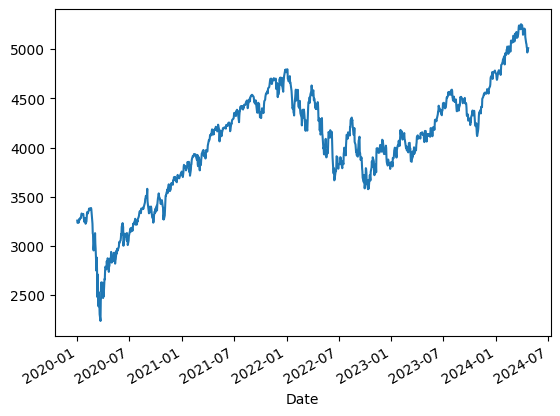

In [ ]:
# plot
data.price_spx.plot()

## Exercises
- 根據上述例子，觀察百分比報酬率與log報酬之間的差異，並檢定是否顯著異於零
- 下載台股加權指數並建立其報酬率變數
- 下載比特幣價格並建立報酬率變數
- 觀察這些資產的**價格走勢**與其報酬率的**相關性**

# 落後運算元
- 將當期資料移到前一期資料，我們可利用$L$進行運算
- 該運算元$L$，我們稱之為落後運算元
- Python中我們也有對應函數

In [ ]:
data.head()

,price_spx,ret_spx_1,ret_spx_2,diff_ret
Date,,,,
2020-01-02,3257.850098,NaN,NaN,NaN
2020-01-03,3234.850098,-0.007060,-0.007085,0.000025
2020-01-06,3246.280029,0.003533,0.003527,0.000006
2020-01-07,3237.179932,-0.002803,-0.002807,0.000004
2020-01-08,3253.050049,0.004902,0.004890,0.000012


In [ ]:
# 落後運算元函數 .shift()
data['ret_spx_1_L2'] = data['ret_spx_1'].shift(2)
data.head()

,price_spx,ret_spx_1,ret_spx_2,diff_ret,ret_spx_1_L1,ret_spx_1_L2
Date,,,,,,
2020-01-02,3257.850098,NaN,NaN,NaN,NaN,NaN
2020-01-03,3234.850098,-0.007060,-0.007085,0.000025,NaN,NaN
2020-01-06,3246.280029,0.003533,0.003527,0.000006,-0.007060,NaN
2020-01-07,3237.179932,-0.002803,-0.002807,0.000004,0.003533,-0.007060
2020-01-08,3253.050049,0.004902,0.004890,0.000012,-0.002803,0.003533


# 模擬白噪音
- 白噪音的生成可利用標準常態分佈的亂數生成函數
- 標準常態分佈亂數生成 `np.random.randn()`
- 白噪音分佈可記為，
$$
WN(0,\sigma^2)
$$

In [ ]:
# construct a white noise
# white noise
# mean=0, variance=sigma^2
mu = 0
sigma = 2
# set random seed
#np.random.seed(1234)
wn = mu + sigma*np.random.randn(1000)

In [ ]:
wn[:5]

array([-0.90886902, -3.06172803, -1.06002643, -0.16691206,  0.3594346 ])

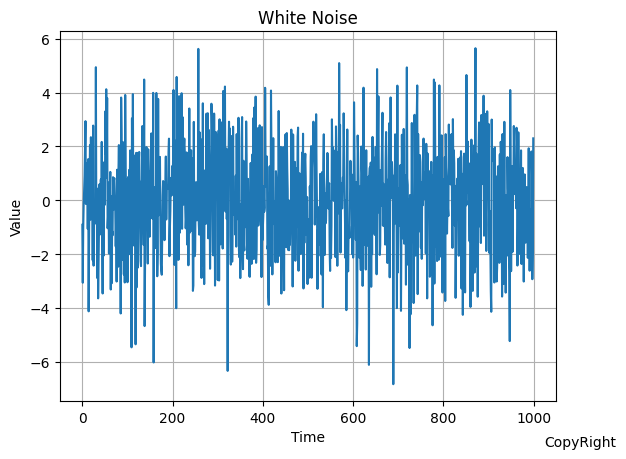

In [ ]:
plt.plot(wn)
plt.title('White Noise')
plt.xlabel('Time')
plt.ylabel('Value')
plt.figtext(0.995, 0.01, 'CopyRight', ha='right', va='bottom')
plt.grid('True')

# 自我相關係數
- 下載匯率和股價資料
- 計算一階自我相關係數 `A.corr(A.shift())`
- 比較其自我相關係數的大小
  - 分別下載資料
  - 合併資料 `pd.merge()`

In [ ]:
# download exchange rate USD/EUR or TWD=X
test = yf.download('TWD=X')
test = test['2020':]
test = test[['Adj Close']]
test.columns = ['price_twdusd']
test.info()

[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1125 entries, 2020-01-01 to 2024-04-23
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price_twdusd  1125 non-null   float64
dtypes: float64(1)
memory usage: 17.6 KB


In [ ]:
test.head()

,price_twdusd
Date,
2020-01-01,29.898001
2020-01-02,29.844000
2020-01-03,29.900000
2020-01-06,30.035000
2020-01-07,30.047001


In [ ]:
# merge by data.index and test.index
data = pd.merge(data,test, left_index=True, right_index=True)

In [ ]:
data['ret_twdusd'] = np.log(data.price_twdusd).diff()


In [ ]:
data.ret_spx.corr(data.ret_twdusd)

-0.004285846010111665

根據上述的測試，我們發現，
- 匯率的自我相關係數高達0.997 (可能是非定態)
- 股價指數也有上述現象，故分析這兩種類型資料應先做一階差分，或者是建立報酬率變數
- S&P500指數跟新台幣兌美元的匯率是無關的

<Axes: xlabel='Date'>

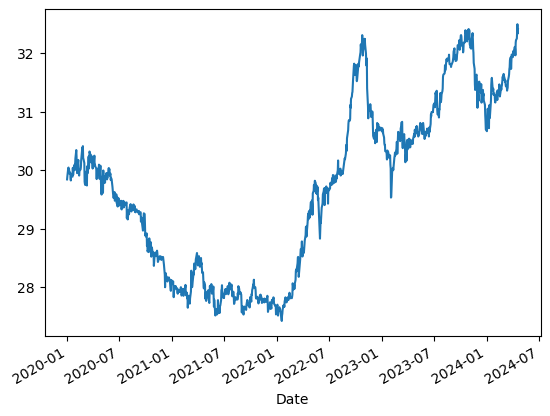

In [ ]:
data.price_twdusd.plot()

In [ ]:
# calculate the first-order autocorrelation of price_spx
data.price_spx.corr(data.price_spx.shift())


0.9963371235091717

# 建立固定趨勢模型
- 建立時間趨勢變數
- 建立時間趨勢模型

In [ ]:
# construct the time trend variable
data['t_trend'] = range(len(data.price_twdusd))
data.head()

,price_spx,ret_spx,price_twdusd,ret_twdusd,t_trend
Date,,,,,
2020-01-02,3257.850098,NaN,29.844000,NaN,0
2020-01-03,3234.850098,-0.007085,29.900000,0.001875,1
2020-01-06,3246.280029,0.003527,30.035000,0.004505,2
2020-01-07,3237.179932,-0.002807,30.047001,0.000399,3
2020-01-08,3253.050049,0.004890,29.985001,-0.002066,4


In [ ]:
# time-trend regression
x = sm.add_constant(data['t_trend'])
y = data.price_spx
result = sm.OLS(y,x,missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              price_spx   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     1364.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          8.83e-194
Time:                        03:51:09   Log-Likelihood:                -7975.5
No. Observations:                1083   AIC:                         1.595e+04
Df Residuals:                    1081   BIC:                         1.596e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3299.3776     23.218    142.103      0.0

<Axes: xlabel='Date'>

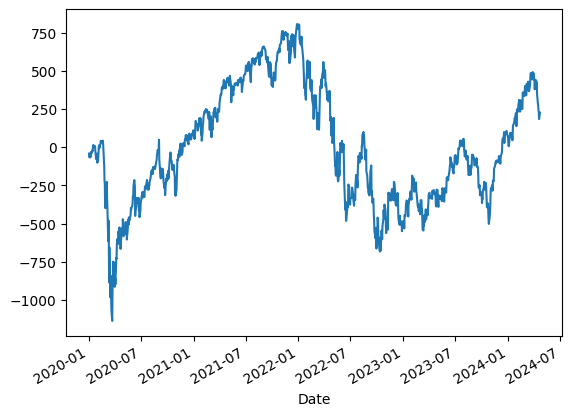

In [ ]:
result.resid.plot()

# 建立季節性趨勢模型
- 建立季節性趨勢變數
- 建立季節性趨勢模型

In [ ]:
# 建立季節性dummy
data['q_dum_1'] = 0
data['q_dum_2'] = 0
data['q_dum_3'] = 0

data['q_dum_1'][data.index.quarter == 1] = 1
data['q_dum_2'][data.index.quarter == 2] = 1
data['q_dum_3'][data.index.quarter == 3] = 1

<ipython-input-33-4e1685fc3da8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['q_dum_1'][data.index.quarter == 1] = 1
<ipython-input-33-4e1685fc3da8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['q_dum_2'][data.index.quarter == 2] = 1
<ipython-input-33-4e1685fc3da8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['q_dum_3'][data.index.quarter == 3] = 1


In [ ]:
# construct the season dummy into our model
x = sm.add_constant(data[['q_dum_1','q_dum_2','q_dum_3']])
y = data.price_spx
result = sm.OLS(y,x,missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              price_spx   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     5.160
Date:                Tue, 23 Apr 2024   Prob (F-statistic):            0.00152
Time:                        03:54:45   Log-Likelihood:                -8409.7
No. Observations:                1083   AIC:                         1.683e+04
Df Residuals:                    1079   BIC:                         1.685e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4118.0573     35.852    114.862      0.0

# 檢驗模型的配適性


In [ ]:
# obtain the residual of the model
result.fittedvalues